# Judul : Analisis Sentimen pada Tweet mengenai Bapak Ganjar Pranowo dan Bapak I Wayan Koster

# Import Library

##### Tweet adalah setiap pesan yang diposting ke Twitter dan dapat berisi foto, video, tautan, serta teks

In [30]:
import numpy as np
import pandas as pd

# Load data

In [31]:
df = pd.read_csv('Dataset.csv')
# melihat 5 data teratas
df.head()

,review,sentiment
0,Ganjar pranowo Prabowo,positive
1,Kocak,positive
2,Harus pandai menepatkan diri,positive
3,Ngeri banget bahasanya,negative
4,Apapun ceritanya saya sdh gak respek sama pak ...,positive


In [32]:
# menampilkan statistik deskriptif dari data
df.describe()

,review,sentiment
count,4000,4000
unique,3991,2
top,Mana nih kemarin yang teriak Konstitusi UUD,positive
freq,2,2034


# Cek jumlah label

#### Import library untuk melakukan visualisasi data pada label

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Ace\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

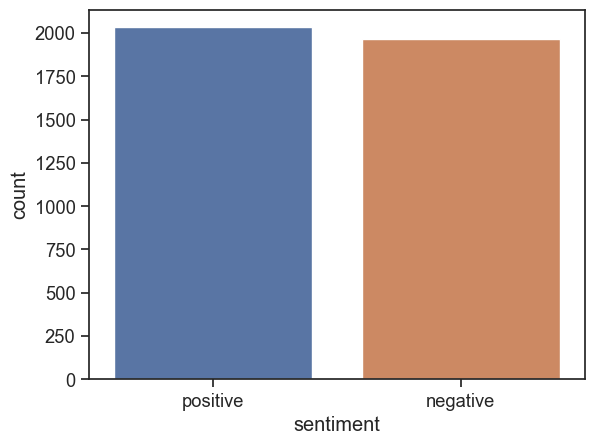

In [34]:
sns.set(style = 'ticks', font_scale = 1.2)
sns.countplot(df.sentiment)

# cek missing values

In [35]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

# Data cleaning

In [37]:
# library yang digunakan untuk membantu kita dalam bekerja dengan teks
import nltk
# menghitung frekuensi kata dalam dokumen
from sklearn.feature_extraction.text import CountVectorizer
# mengurangi jumlah kata dalam sebuah dokumen yang nantinya akan berpengaruh dalam kecepatan dan performa NLP
from nltk.corpus import stopwords
# menampilkan data teks dalam bentuk visual yang mudah dibaca dan dipahami
from wordcloud import WordCloud,STOPWORDS
# diperlukan untuk mendapatkan kata-kata yang valid
from nltk.stem import WordNetLemmatizer
# Melakukan Tokenisasi sebuah string untuk memisahkan tanda baca selain titik
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
# menghapus beberapa elemen atau karakter
import re,string,unicodedata
# menghapus tanda baca
from string import punctuation

In [38]:
df['review']

0                                  Ganjar pranowo Prabowo
1                                                   Kocak
2                            Harus pandai menepatkan diri
3                                  Ngeri banget bahasanya
4       Apapun ceritanya saya sdh gak respek sama pak ...
                              ...                        
3995    Setelah kejadian ini. Nunggu arah dari pa Jokowi.
3996    Ketua partai berarti yg kuncinya ya ??? Gilole...
3997       Ada orang nyemangatin dan ngedoain Pemimpinnya
3998    Wong nyemangatin dan ngedoain Pemimpin kok nya...
3999    Banyak yang begitu.... Fanatik tapi vak sadar ...
Name: review, Length: 4000, dtype: object

In [40]:
def hapus_kurung(text):
  return re.sub('\[[^]]*\]', '', text)
def hapus_url(text):
    return re.sub(r'http\S+', '', text)
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
# mengunduh module yg ada di ntlk
nltk.download('stopwords')
# memakai module stopword yg berbahasa indonesia
stop = set(stopwords.words('indonesian'))
# membuat list kumpulan tanda baca
punctuation = list(string.punctuation)
stop.update(punctuation)
# menghapus stopwords
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# cleaning data text
def clean_text(text):
  text = hapus_kurung(text)
  text = hapus_url(text)
  text = remove_special_characters(text, remove_digits=True)
  text = remove_stopwords(text)
  return text

df['review'] = df['review'].apply(clean_text)

In [42]:
# melihat 5 data teratas teks yang sudah bersih
df.head()

,review,sentiment
0,ganjar pranowo prabowo,positive
1,kocak,positive
2,pandai menepatkan,positive
3,ngeri banget bahasanya,negative
4,apapun ceritanya sdh gak respek ganjar penyeba...,positive


# Mengubah label menjadi angka

#### dikarenakan model pemroresan datanya numerik maka diubah dulu dari string menjadi numerik pelabelannya

In [43]:
# mengganti review positive dengan angka 1 dan negative dengan angka 0
df.sentiment.replace("positive" , 1 , inplace = True)
df.sentiment.replace("negative" , 0 , inplace = True)
df.head()

,review,sentiment
0,ganjar pranowo prabowo,1
1,kocak,1
2,pandai menepatkan,1
3,ngeri banget bahasanya,0
4,apapun ceritanya sdh gak respek ganjar penyeba...,1


#Membuat Wordcloud

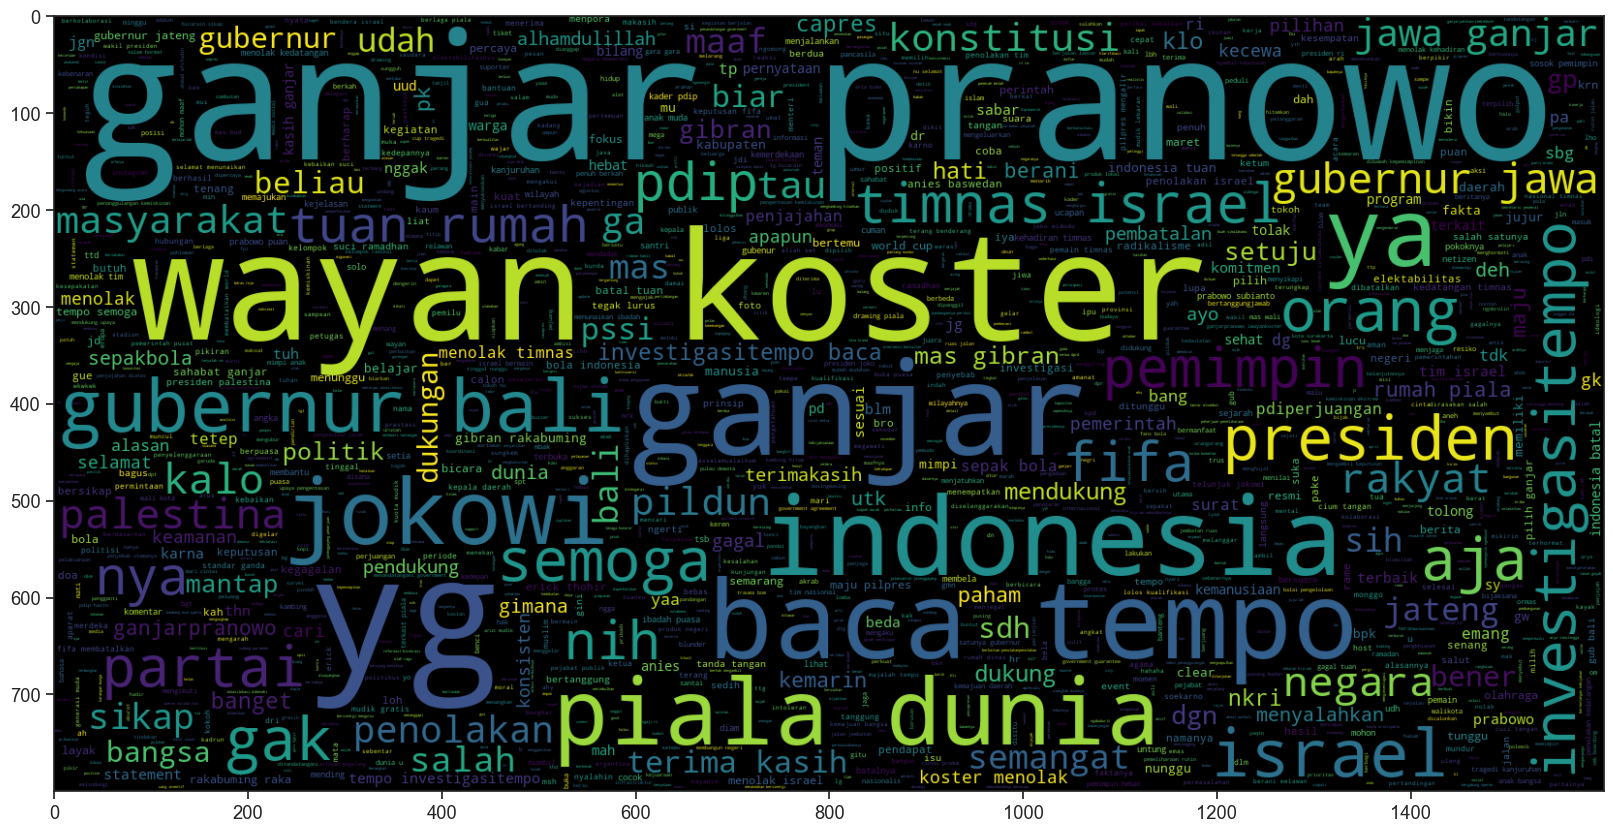

In [44]:
# visualisasi kata yg sering keluar untuk label positif
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

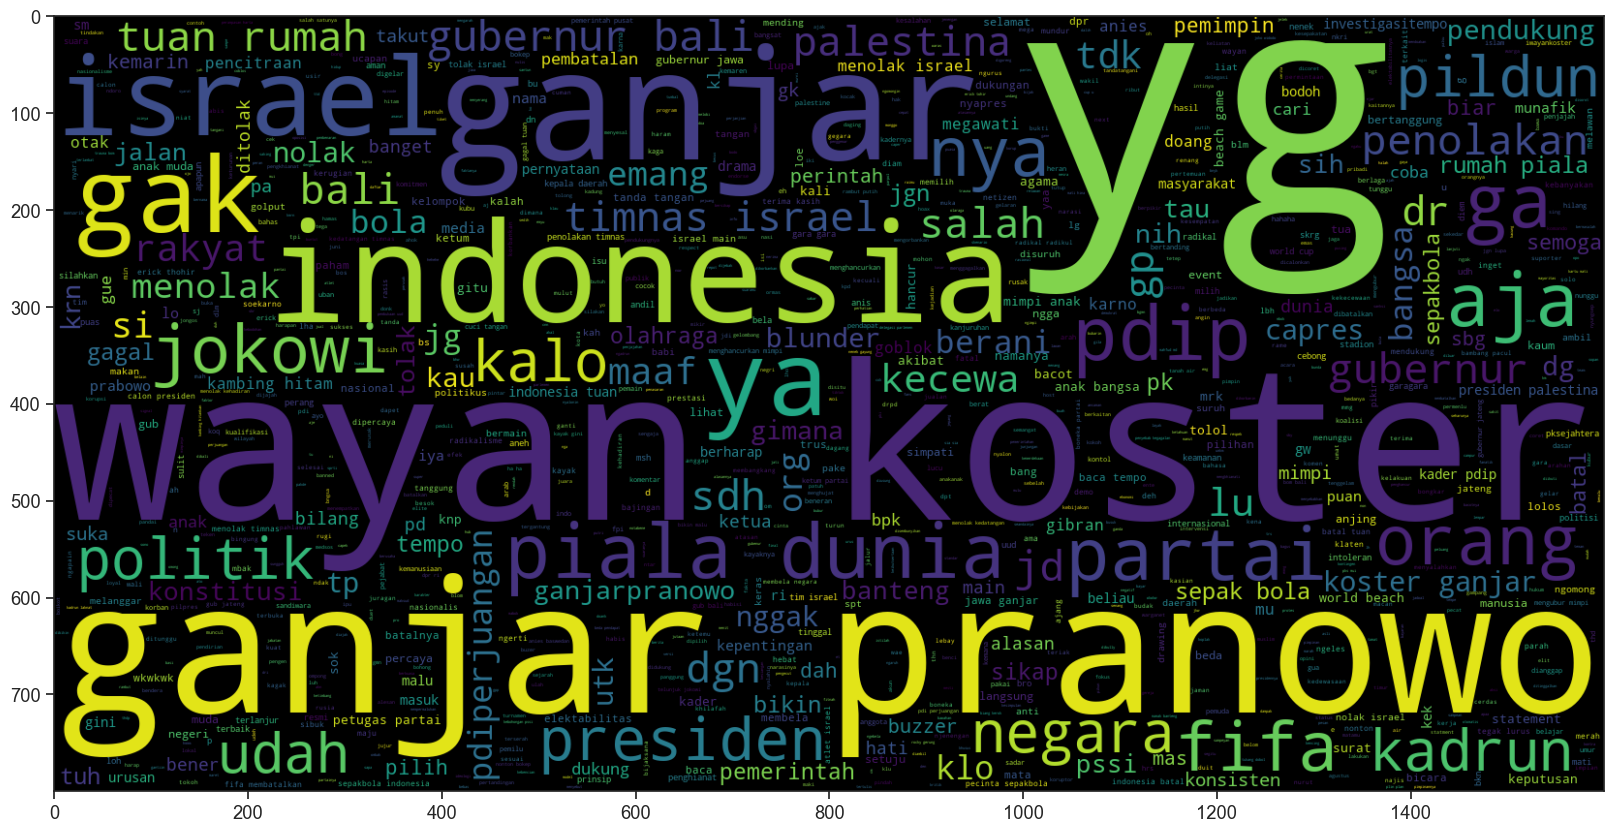

In [45]:
# visualisasi kata yg sering keluar untuk label negatif
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')

In [46]:
text = df['review'].values.tolist()
label = df['sentiment'].values

# Vektorisasi

#### mengubah data teks pada model menjadi numerik

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# transform data teks pada kolom review menjadi vektor numerik menggunakan TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer().fit(text)
tfidf_text = tfidf_vectorizer.transform(text)

In [49]:
# split atau membagi data menjadi data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

In [50]:
# model Support Vector Classification
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [51]:
# melatih data menggunakan data train
model = SVC().fit(X_train,y_train)

In [52]:
# hasil prediksi model menggunakan svm
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.78      0.67      0.73       697
           1       0.62      0.74      0.68       503

    accuracy                           0.70      1200
   macro avg       0.70      0.71      0.70      1200
weighted avg       0.72      0.70      0.71      1200



##### hasil yg didapatkan mungkin kurang cukup baik, dengan accuracy, precision, dan recall yang mendapatkan nilai yg biasa saja, tetapi dapat disimpulkan bahwa model ini masih dapat digunakan dalam melakukan klasifikasi atau prediksi sentimen dari data tweet mengenai bapak ganjar pranowo & bapak i wayan koster yg digunakan.

In [53]:
# melakukan clean text, melakukan vectorizer untuk menjadikan teks menjadi numerik, untuk prediksinya menggunakan fungsi predict yang kemudian masukkan vector tfidfnya kedalam predict, lalu print nilai positif = 1 dan negatif = 0
def prediksi(text):
  text = clean_text(text)
  tfidf_vektor = tfidf_vectorizer.transform([text])
  pred = model.predict(tfidf_vektor)
  if pred == 1:
    sentimen = 'positif'
  else:
    sentimen = 'negatif'
  return sentimen

In [54]:
prediksi('piala dunia gagal')

'negatif'

In [55]:
prediksi('dukung bapak ganjar')

'positif'